In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('final_df.csv')
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df[(df['Condition'] != 3) & (df['Condition'] != 4) & 
        (df['Condition'] != 5) & (df['Condition'] != 6) & 
        (df['Condition'] != 7) & (df['Condition'] != 8)]

In [4]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['Condition'].unique()

array([0, 1, 2])

In [6]:
df_label = df['Condition']
df_label_string = df_label.unique()

In [7]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df = df.drop(['Country', 'BMI'], axis=1)

In [9]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df.loc[:, (df != 0).any(axis=0)]

In [11]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
df = df.reset_index(drop=True)

In [13]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
313,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
314,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
315,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [14]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [15]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,1,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
313,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
314,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
315,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [16]:
df = df[df['Age'] >= 1]

In [17]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,1,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
313,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
314,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
315,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [18]:
df = df.reset_index(drop=True)

In [19]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
311,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
312,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
313,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [20]:
y = df['Condition']
X = df.drop(['Condition'], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
y_test_array = np.array(y_test)
y_test_array

array([0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1])

In [22]:
smote = SMOTE()
X_train_over_smote, y_train_over_smote = smote.fit_resample(X_train, y_train)
# same results as without oversampling 

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

1.0

In [25]:
report = classification_report(y_test, y_pred, target_names=df_label_string, output_dict=True)
report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,41.0
1,1.0,1.0,1.0,15.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,63.0
weighted avg,1.0,1.0,1.0,63.0


In [26]:
y_prob = rf.predict_proba(X_test)
y_prob[0:5]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01],
       [0.  , 1.  , 0.  ]])

In [27]:
y_test_bin = label_binarize(y_test_array, classes=np.arange(3))  # Shape: (num_samples, 8)
y_test_bin[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

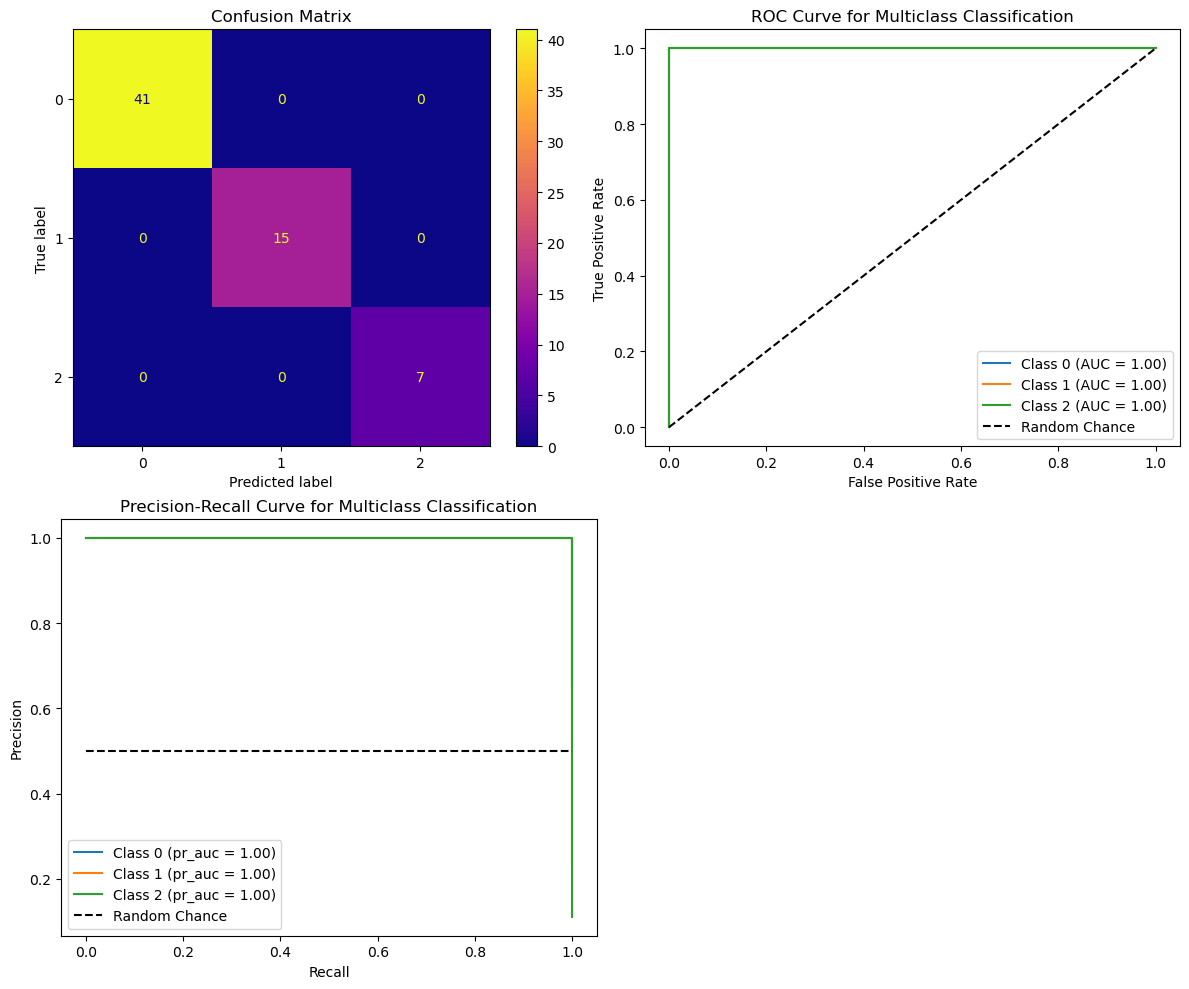

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(3): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(3): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('rf_neuro_graphs.jpg')
plt.show()
